<a href="https://colab.research.google.com/github/keerthana-narra/Stock-Prediction/blob/main/N_Sai_Keerthana_reddy_Nifty_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem Statement : We have the data of Nifty50 stock from 2000 to till date. The data has four features of high, low, open and close. This can be suited by time series model. The task here is to predict what would be the closing stock price.



##Loading data and importing libraries

In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
missing_values = ['N/a', 'na', 'np-nan']

In [5]:
#Reading data
nifty = pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/capstone-2/ Nifty50_data.csv", na_values= missing_values, header=0, index_col=0, parse_dates=True, squeeze=True)

## Understanding data and Preparing data

In [6]:
#Shape of dataset
nifty.shape

(5301, 4)

In [7]:
#Acessing top 5 rows
nifty.head()

,Open,High,Low,Close
Date,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2
2000-01-04,1594.40,1641.95,1594.40,1638.7
2000-01-05,1634.55,1635.50,1555.05,1595.8
2000-01-06,1595.80,1639.00,1595.80,1617.6
2000-01-07,1616.60,1628.25,1597.20,1613.3


In [8]:
# Acessing bottom 5 rows
nifty.tail()

,Open,High,Low,Close
Date,,,,
2021-05-04,14687.250000,14723.400391,14461.500000,14496.500000
2021-05-05,14604.150391,14637.900391,14506.599609,14617.849609
2021-05-06,14668.349609,14743.900391,14611.500000,14724.799805
2021-05-07,14816.849609,14863.049805,14765.500000,14823.150391
2021-05-10,14928.250000,14966.900391,14892.500000,14942.349609


The data is a daily recorded data. It has data from 01 January 2000 to 10 May 2021.

In [9]:
# Checking for null values
nifty.isnull().sum()

Open     35
High     35
Low      35
Close    35
dtype: int64

The data has null values. So it will require any null treatment.

In [10]:
nifty = nifty.interpolate()

To treat null vaules here I used interpolate method. In which the null value is filled by the average of above and below values.

In [11]:
# Describing data
nifty.describe()

,Open,High,Low,Close
count,5301.000000,5301.000000,5301.000000,5301.000000
mean,5559.311660,5596.408330,5514.357326,5556.140654
std,3578.384109,3590.088394,3556.946877,3573.791012
min,853.000000,877.000000,849.950000,854.200000
25%,2063.600000,2081.850000,2051.350000,2063.400000
50%,5215.899902,5255.649902,5169.049805,5215.700195
75%,8262.549805,8308.150391,8216.400391,8262.349609
max,15371.450195,15431.750000,15243.400391,15314.700195


In [12]:
nifty.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2021-04-27', '2021-04-28', '2021-04-29', '2021-04-30',
               '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
               '2021-05-07', '2021-05-10'],
              dtype='datetime64[ns]', name='Date', length=5301, freq=None)

In [68]:
# Create the dependent variable..we want to predict the directionality of index movement in next day.
nifty.loc[(nifty['Close']-nifty['Close'].shift(-3)) < 0,'target']=1  # If the index goes up in the next day it is taken as 1
nifty.loc[(nifty['Close']-nifty['Close'].shift(-3)) > 0,'target']=0  # If the index goes down in the next day it is taken as 0

In [69]:
nifty.shape

(5301, 5)

In [70]:
nifty['2008']

,Open,High,Low,Close,target
Date,,,,,
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,1.0
2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,1.0
2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,1.0
2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,0.0
2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,0.0
...,...,...,...,...,...
2008-12-24,2967.399902,2968.000000,2900.449951,2916.850098,1.0
2008-12-26,2919.850098,2960.949951,2844.800049,2857.250000,1.0
2008-12-29,2857.149902,2931.800049,2812.899902,2922.199951,1.0


In [57]:
# Obtaining the class distribution of both classes of our dependent variable
nifty.target.value_counts()

1.0    2857
0.0    2437
Name: target, dtype: int64

In [15]:
nifty.info

<bound method DataFrame.info of                     Open          High           Low         Close  target
Date                                                                      
2000-01-03   1482.150000   1592.900000   1482.150000   1592.200000     1.0
2000-01-04   1594.400000   1641.950000   1594.400000   1638.700000     0.0
2000-01-05   1634.550000   1635.500000   1555.050000   1595.800000     1.0
2000-01-06   1595.800000   1639.000000   1595.800000   1617.600000     0.0
2000-01-07   1616.600000   1628.250000   1597.200000   1613.300000     1.0
...                  ...           ...           ...           ...     ...
2021-05-04  14687.250000  14723.400391  14461.500000  14496.500000     1.0
2021-05-05  14604.150391  14637.900391  14506.599609  14617.849609     1.0
2021-05-06  14668.349609  14743.900391  14611.500000  14724.799805     1.0
2021-05-07  14816.849609  14863.049805  14765.500000  14823.150391     1.0
2021-05-10  14928.250000  14966.900391  14892.500000  14942.349609  

##Visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


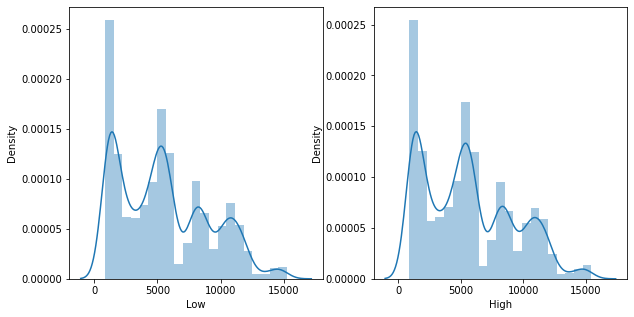

In [16]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(nifty['Low'], ax=axes[0])
sns.distplot(nifty['High'], ax=axes[1])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


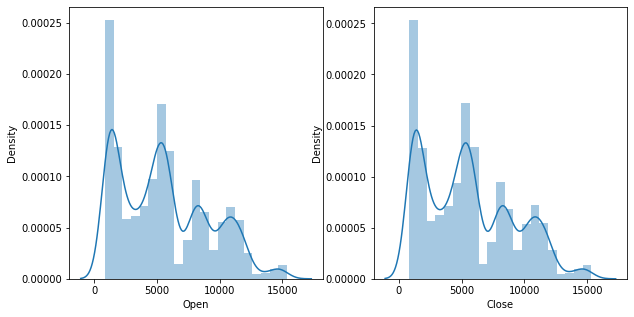

In [17]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(nifty['Open'], ax=axes[0])
sns.distplot(nifty['Close'], ax=axes[1])


The data is distributed over a range. It can observed that there is more density of observations at low prices. And there is trend of decreasing. 
This can mean in two ways. First one is nifty is likely to have low values in the range 1000-7000 or the second way is that the no.of observations recorded at higher prices are comparitively low. 

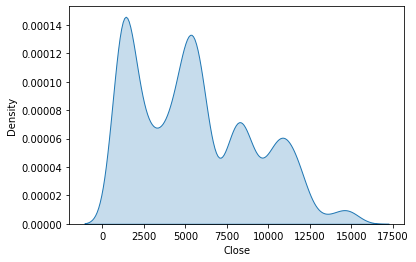

In [18]:
sns.kdeplot(nifty['Close'],shade=True)


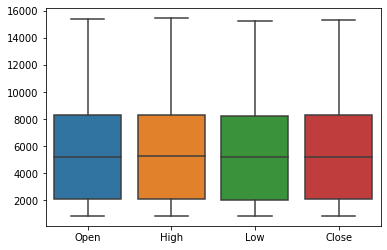

In [19]:
sns.boxplot(data=nifty[['Open','High','Low','Close']])

From the above box plots we can infere that the data of the features of a taken are more or less similar. There are no outlier observations which needs to be appreciated.

let us see some Correlation plots

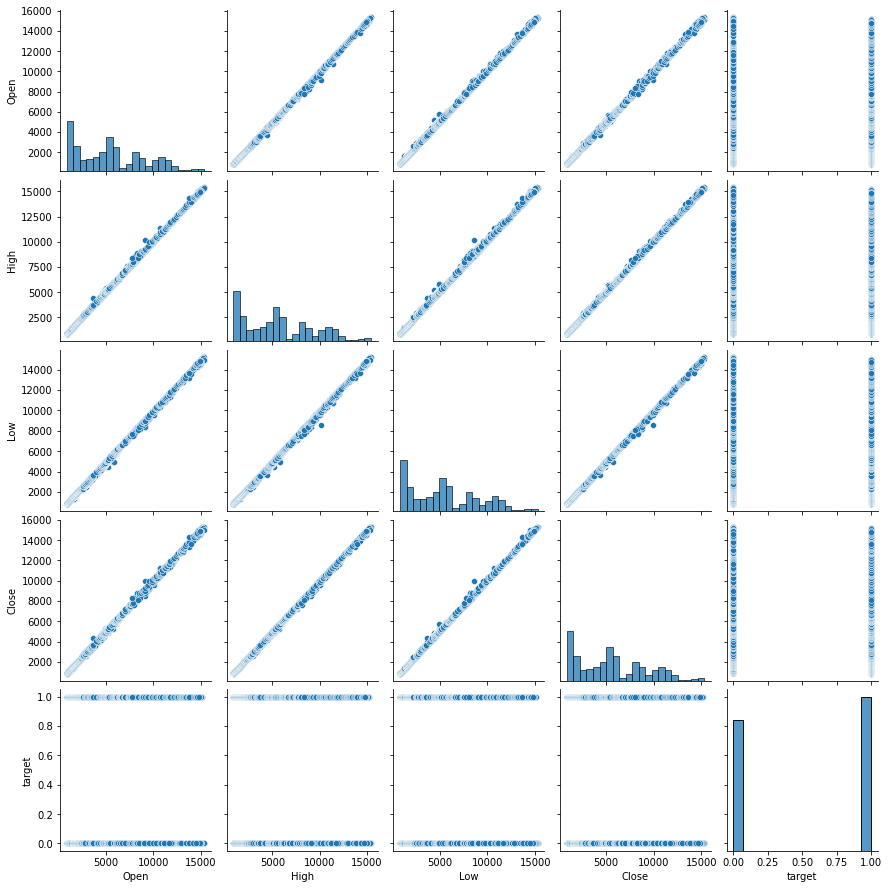

In [20]:
#pair plot
sns.pairplot(nifty[1:])

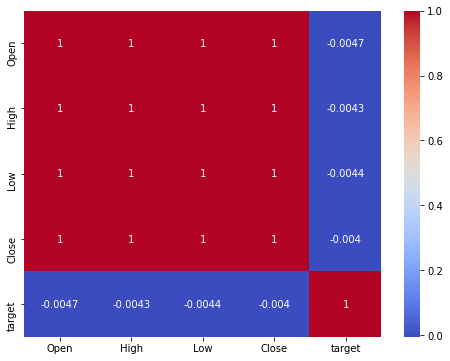

In [21]:
 ## Correlation heat map
plt.figure(figsize=(8,6))
correlation = nifty.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [22]:
features = nifty.describe().columns


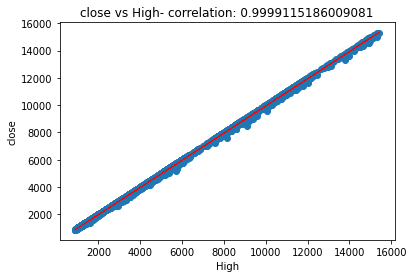

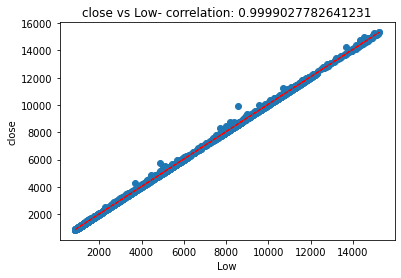

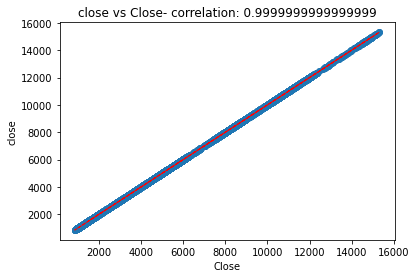

In [23]:
#Sactter plot with estimating correlation values
for col in features[1:-1]:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca()
    feature = nifty[col]
    label = nifty['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('close')
    ax.set_title('close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(nifty[col], nifty['Close'], 1)
    y_hat = np.poly1d(z)(nifty[col])

    plt.plot(nifty[col], y_hat, "r--", lw=1)

plt.show()

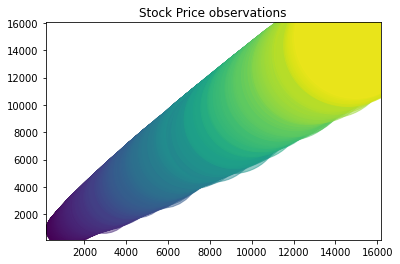

In [64]:
plt.scatter(nifty['High'], nifty['Close'], nifty['Open'], nifty['Low'], alpha=0.5)
plt.title('Stock Price observations')
plt.show()

The above pair plot and scatter plot shows that the features close, high, low, open are having strong positive correlation. This mean that stock price range observed in a particular month is in range of their own features.

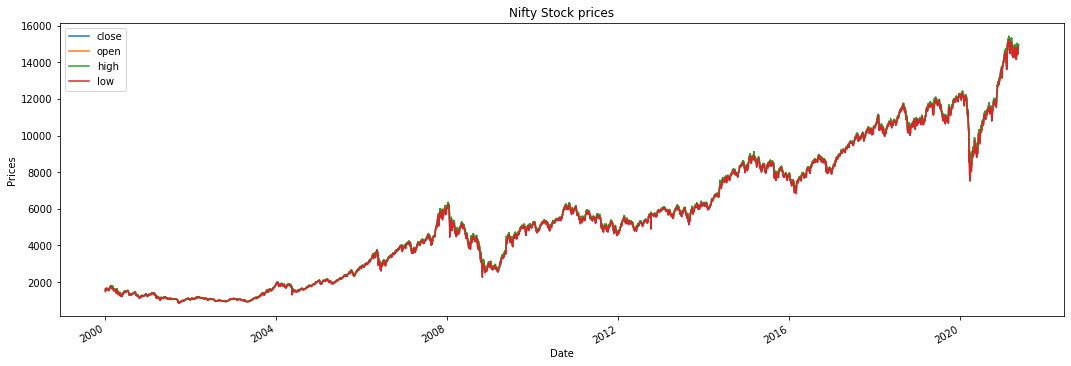

In [25]:
#Multi Line plot
plt.subplots(figsize=(18,6))
plt.xlabel('Date')
plt.ylabel('Prices')
nifty['Close'].plot(label='close')
nifty['Open'].plot(label='open')
nifty['High'].plot(label='high')
nifty['Low'].plot(label='low')
plt.legend()
plt.title('Nifty Stock prices')
plt.show()

from here we can see there is increasing trend and thats the reason 

The features of the data are seeming to get overlapped

## Understanding more about close and target variable

In [26]:
close = nifty['Close']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


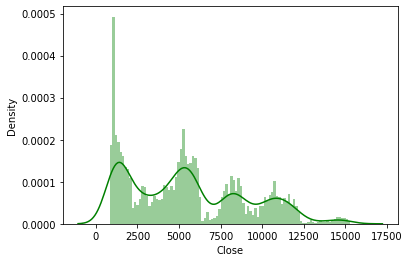

In [27]:
sns.distplot(nifty.loc['2000-01-01':'2021-05-01']['Close'],color='green',bins=100)


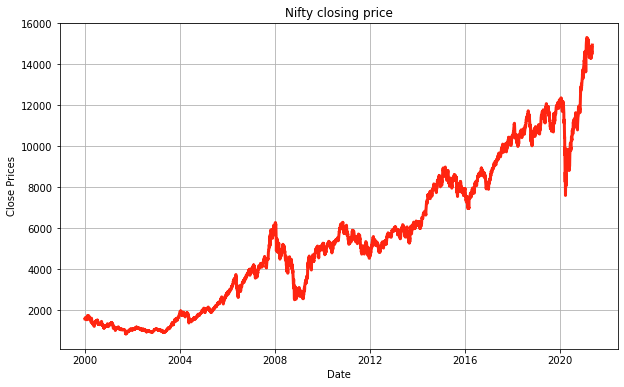

In [28]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot( close.index, close.values, marker='', color='#FF2511', linewidth=3)
plt.title('Nifty closing price')
plt.show()


there is a drastic drop can be seen in 2020 due to lockdown which was implemented in the country.

In [29]:
nifty[nifty['Close']== nifty.['Close'].max()]


,Open,High,Low,Close,target
Date,,,,,
2021-02-15,15270.299805,15340.150391,15243.400391,15314.700195,0.0


In [72]:
nifty.iloc[2200:3400] # This shows that the maximum value occured is not a reason of outlier and the data is likely to see maximum points with time.

,Open,High,Low,Close,target
Date,,,,,
2008-10-14,3494.100098,3648.250000,3491.500000,3518.649902,0.0
2008-10-15,3517.899902,3518.500000,3324.550049,3338.399902,0.0
2008-10-16,3333.850098,3333.850098,3099.899902,3269.300049,0.0
2008-10-17,3269.050049,3335.949951,3046.600098,3074.350098,0.0
2008-10-20,3108.199951,3238.399902,3058.949951,3122.800049,0.0
...,...,...,...,...,...
2013-08-13,5600.250000,5704.750000,5578.899902,5699.299805,0.0
2013-08-14,5715.399902,5754.549805,5690.200195,5742.299805,0.0
2013-08-16,5705.450195,5716.600098,5496.049805,5507.850098,0.0


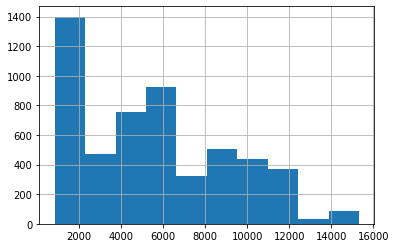

In [32]:
close.hist()

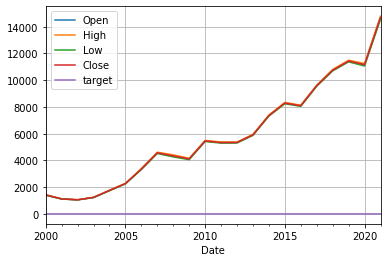

In [33]:
# Time resampling with rule AS - Year start
x = nifty.resample(rule = 'AS').mean()
x.plot()
plt.grid('true')

Despite of the high and low prices recorded open and close prices kind of overlap or likely to be near values.

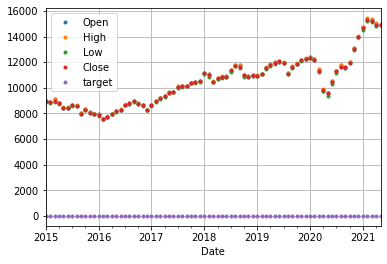

In [34]:
# Time resampling with rule M - Month end
x = nifty.resample(rule = 'M').max()
x.plot(xlim = ["2015-01-01", "2021-05-10"], style = '.')
plt.grid('true')

Lag Scatter plots : Relation between a observation and its previous observation.
Previous observations are termed as lags. Lag at one step is lag1 and two steps is lag2. Lag_plot plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


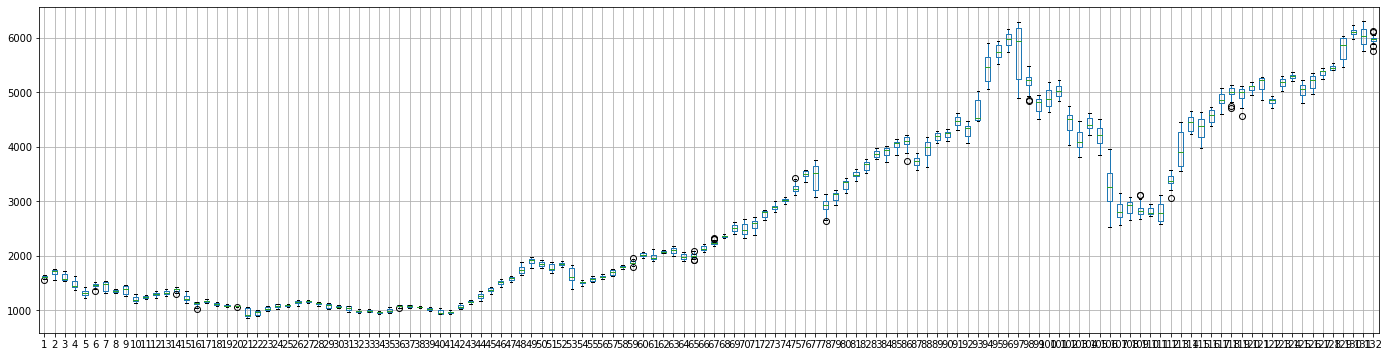

In [45]:
# Box plot
from pandas import Grouper
plt.figure(figsize=(24,6))

first_ten_years = close['2000':'2010']
groups = first_ten_years.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,133)
months.boxplot()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


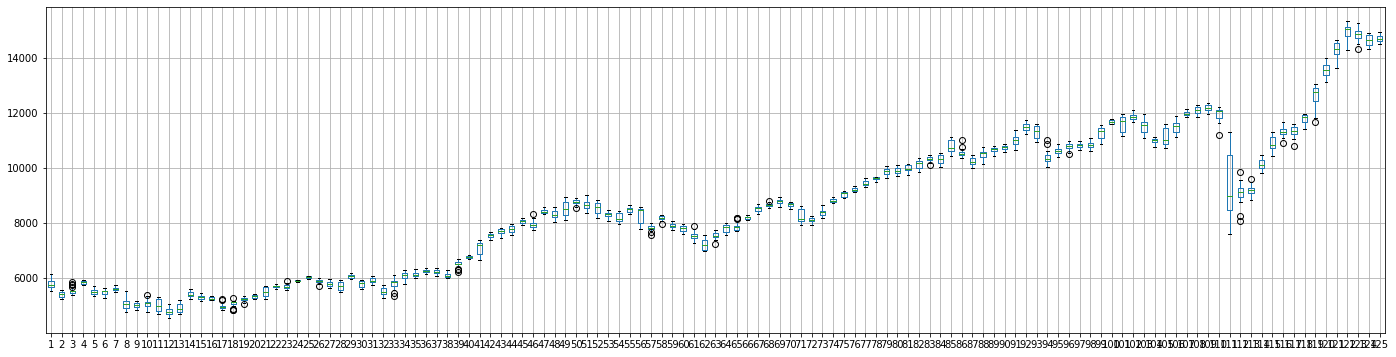

In [44]:

plt.figure(figsize=(24,6))

next_ten_years = close['2011':'2021']
groups = next_ten_years.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,126)
months.boxplot()
plt.show()

These box plots show the distribution of monthly data. For visibility purpose the data was divided into 2 and plotted.

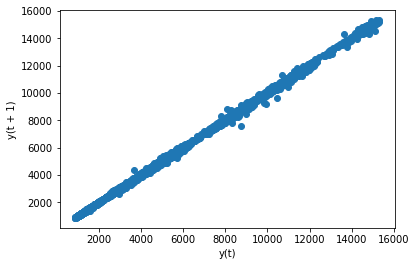

In [35]:
# Lag plot
from pandas.plotting import lag_plot
lag_plot(close)
plt.show()

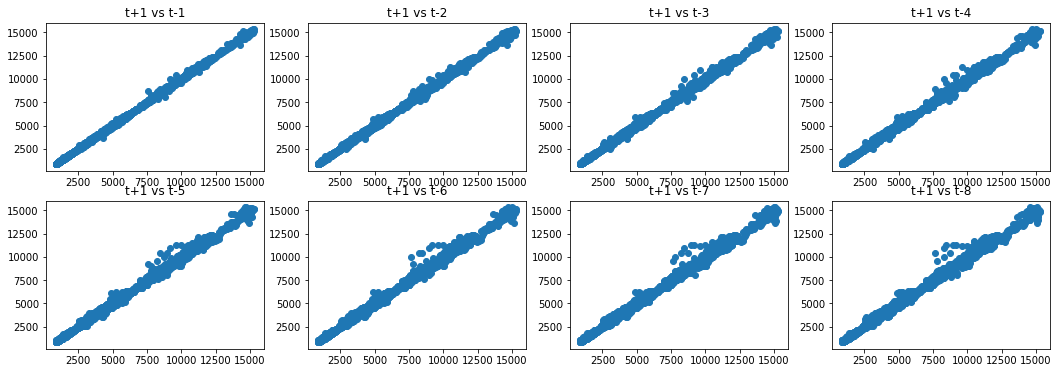

In [59]:
from pandas import DataFrame
from pandas import concat
values = DataFrame(close.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.subplots(figsize=(18,6))
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()


The lag1 shows highly positive correlation which decreas